<a href="https://colab.research.google.com/github/Forkyknight/Geeksman_AISqaud_Project1_Chirag/blob/master/2%3Dmodel_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mounting the google drive to have its access

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


uploading kaggle.json file

In [2]:
from google.colab import files
my_file=files.upload()


Saving kaggle.json to kaggle.json


importing all the relevent modules:-

1.   pandas for reading dataframes and file
2.   numpy to deal with n dimensional numeric arrays
3.   cv2 to deal with images


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
import pandas as pd
import numpy as np
import cv2
import sys
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



reading credential from kaggle.json


In [3]:
cred=pd.read_json("kaggle.json",lines=True)
os.environ["KAGGLE_USERNAME"]=cred.iloc[0][0]
os.environ["KAGGLE_KEY"]=cred.iloc[0][1]

downloading data for training and testing



In [4]:
!kaggle datasets download -d jatinsoni/ferdata

 90% 54.0M/60.3M [00:01<00:00, 30.2MB/s]
100% 60.3M/60.3M [00:01<00:00, 47.9MB/s]


In [5]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating: train/sad/Training_65526454.jpg  
  inflating

lets explore the train folder:- thats what all emotion do we have

In [ ]:
print(os.listdir("train"))


['disgust', 'surprise', 'angry', 'fear', 'neutral', 'happy', 'sad']


Now creating data bunch object by using ImageDataBunch.from_folder  as the labels are the (folder name ) imges data are in those folders

In [6]:
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("train"), valid_pct=0.2, bs=64, size=224, ds_tfms=tfms)

lets explore some of the images in dataset

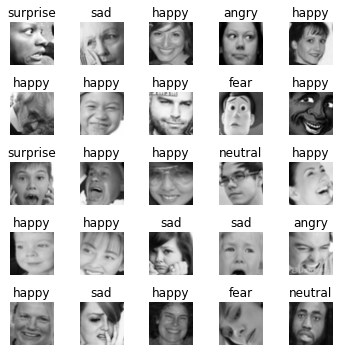

In [7]:
data.show_batch(rows=5, figsize=(5,5))

now converting data in form readable to the model.....  and the model we are going to use is resnet50

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,accuracy,time
0,2.272550,1.761464,0.394182,03:26
1,1.699893,1.476248,0.453057,03:24
2,1.447746,1.339064,0.493468,03:24
3,1.328992,1.242834,0.527608,03:22
4,1.216797,1.146105,0.565407,03:22
5,1.159788,1.098719,0.592928,03:23
6,1.119691,1.072104,0.599895,03:25
7,1.044103,1.030613,0.613134,03:26
8,1.011924,1.011217,0.626372,03:28
9,0.971650,0.988498,0.632991,03:30


In [ ]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,0.886314,0.972671,0.642919,03:37
1,0.911932,0.990738,0.641700,03:33
2,0.931955,0.978743,0.639958,03:30
3,0.925030,0.966938,0.639261,03:30
4,0.892803,0.953653,0.649538,03:29
5,0.841630,0.949145,0.650758,03:29
6,0.784959,0.942530,0.658073,03:32
7,0.782407,0.940311,0.656506,03:31


In [ ]:
my_dir="/content/drive/My Drive/Geeksman_AISquad_Project1_(Chirag)"

In [ ]:
learn.save(my_dir+"/Stage-1")

In [ ]:
learn.export(my_dir+"/export.pkl")

In [ ]:
#from kora.drive import upload_public
#url = upload_public('/content/drive/My Drive/Geeksman_AISquad_Project1_(Chirag)/export.pkl')
#url

'https://drive.google.com/uc?id=1vVIz8jAmQG0CHreQ-_-Mr9-KlSX6fOra'

In [ ]:
learn.load("/content/drive/My Drive/Geeksman_AISquad_Project1_(Chirag)/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (22968 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
disgust,disgust,disgust,disgust,disgust
Path: train;

Valid: LabelList (5741 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
surprise,surprise,angry,fear,neutral
Path: train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stat

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

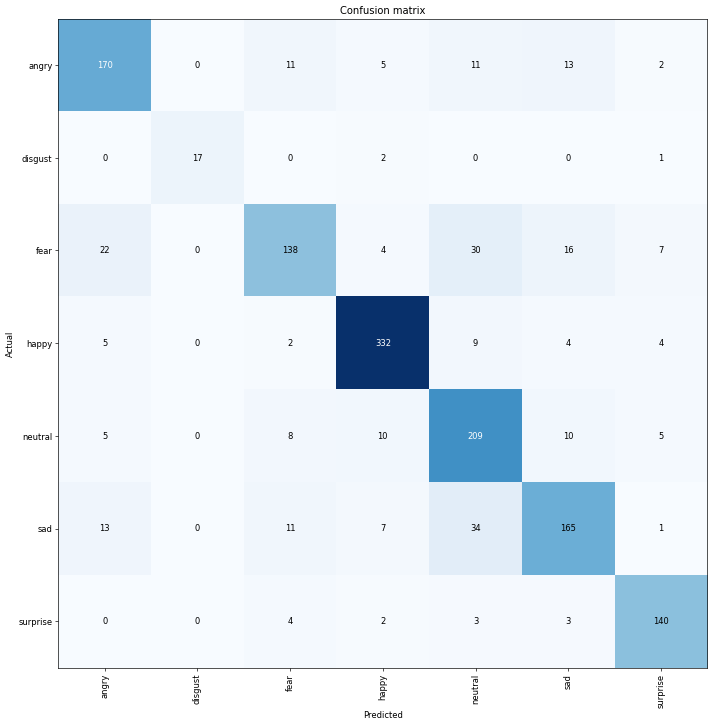

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)